# Test Commands

In [1]:
import os
import torch
import torchaudio
import math, random
import librosa
import numpy as np
from matplotlib import pyplot as plt
from torchaudio import transforms
from IPython.display import Audio

test_data = os.path.join('dataset', 'ambulance_data', 'ambulance54.wav')

metadata = torchaudio.info(test_data)
sig, sr = torchaudio.load(test_data)
sig.shape

torch.Size([2, 422912])

In [2]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(specgram, origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
#plot_spectrogram(spec[0], new_sr)

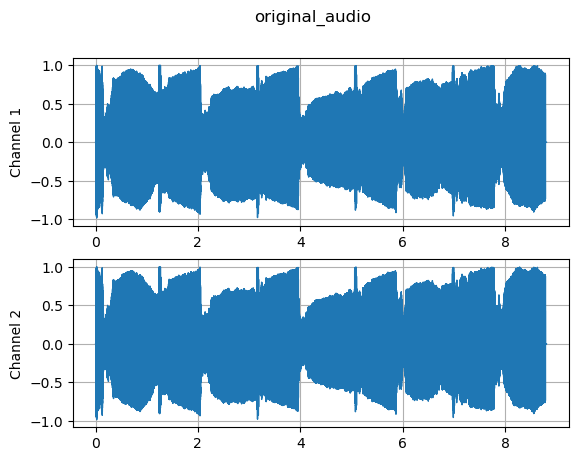

In [2]:
def plot_waveform(waveform, sample_rate, name):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(name)
    plt.show(block=False)
    
plot_waveform(sig, sr, "original_audio")

In [ ]:
duration = 3000
new_sr = 44100
shift_pct = 0.4
n_mels=64
n_fft=1024
hop_len=None
top_db = 80
channel = 2

aud = AudioUtil.open(test_data)
print(aud)
    
reaud = AudioUtil.resample(aud, sr)
rechan = AudioUtil.rechannel(reaud, channel)

dur_aud = AudioUtil.pad_trunc(rechan, duration)
shift_aud = AudioUtil.time_shift(dur_aud, shift_pct)
sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

print(dur_aud)
print(aug_sgram)

plot_spectrogram(aug_sgram[0], new_sr)

In [ ]:
max_ms = 3000
new_sr = 44100
shift_pct = 0.4
n_mels=64
n_fft=1024
hop_len=None
top_db = 80

if (sig.shape[0] == 1):
      resig = torch.cat([sig, sig])

if (sr != new_sr):
    num_channels = resig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, new_sr)(resig)
    
    if (resig.shape[0] > 1):
                
      
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])
    
num_rows, sig_len = resig.shape
max_len = sr//1000 * max_ms

if (sig_len > max_len):
      # Truncate the signal to the given length
    sig = resig[:,:max_len]

elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
    pad_begin_len = random.randint(0, max_len - sig_len)
    pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
    pad_begin = torch.zeros((num_rows, pad_begin_len))
    pad_end = torch.zeros((num_rows, pad_end_len))

    sig = torch.cat((pad_begin, resig, pad_end), 1)

_, sig_len = sig.shape
shift_amt = int(random.random() * shift_pct * sig_len)
shifted_sig = sig.roll(shift_amt)

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
spec = transforms.MelSpectrogram(new_sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(shifted_sig)


    # Convert to decibels
spec = transforms.AmplitudeToDB(top_db=top_db)(spec)

#spec = torch.abs(spec)

print(spec.shape)
plot_waveform(sig,new_sr,'original audio')
plot_waveform(shifted_sig,new_sr, 'time shifted audio')

In [ ]:
Audio(sig.numpy(), rate=new_sr)

In [ ]:
filename = 'sound_classification_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
external_model = pickle.load(open('sound_classification_model.sav', 'rb'))

In [ ]:
# ----------------------------
def inference (model, data):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
      # Get the input features and target labels, and put them on the GPU
      data_1 = data[0].clone().detach()
      data_2 = torch.Tensor(data[1])
      inputs = data_1.to(device)
      label = data_2.to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.float().mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s
      print(inputs)
      # Get predictions
      model.to(device)
      outputs = model(inputs.unsqueeze(0))

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
    
  #acc = correct_prediction/total_prediction
  print(prediction)

# Run inference on trained model with the validation set
inference(external_model, processed_audio)

# Manipulate LSAFEV dataset

In [ ]:
import pandas as pd

ambulance = pd.read_csv('D://Thesis//Emergency Priority//sound-recognition//dataset//Ambulance_final.csv')
ambulance['file_path'] = '//ambulance_data'
ambulance['classID'] = "1"
ambulance.head()

In [ ]:
road = pd.read_csv('D://Thesis//Emergency Priority//sound-recognition//dataset//Road_final.csv')
road['file_path'] = '//road_data'
road['classID'] = "0"
road.head()

In [ ]:
merge_data = pd.concat([ambulance, road])
merge_data

In [ ]:
merge_data.to_csv('D://Thesis//Emergency Priority//dataset//audio_dataset.csv', index=False)

# Import final dataset

In [3]:
import pandas as pd

# Read metadata file
metadata_file = 'D://Thesis//Emergency Priority//dataset//audio_dataset.csv'
df = pd.read_csv(metadata_file)
df.head()

# Take relevant columns
df = df[['filename', 'file_path', 'classID']]
df

filename         file_path  classID
0     ambulance142.wav  //ambulance_data        1
1     ambulance449.wav  //ambulance_data        1
2     ambulance888.wav  //ambulance_data        1
3     ambulance474.wav  //ambulance_data        1
4     ambulance305.wav  //ambulance_data        1
...                ...               ...      ...
1829       road638.wav       //road_data        0
1830       road323.wav       //road_data        0
1831       road233.wav       //road_data        0
1832       road244.wav       //road_data        0
1833       road171.wav       //road_data        0

[1834 rows x 3 columns]

# Create Audio Manipulation

In [4]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)

  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))


  # ----------------------------
  # Since Resample applies to a single channel, we resample one channel at a time
  # ----------------------------
  @staticmethod
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
  @staticmethod
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      
    return (sig, sr)

  # ----------------------------
  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  # ----------------------------
  @staticmethod
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)


  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

  # ----------------------------
  # Augment the Spectrogram by masking out some sections of it in both the frequency
  # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
  # overfitting and to help the model generalise better. The masked sections are
  # replaced with the mean value.
  # ----------------------------
  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
        aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
        aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

# Create Dataset loader

In [5]:
from torch.utils.data import  Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class AudioDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 3000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx,'file_path'] + '//' + self.df.loc[idx,'filename']
    #self.data_path + self.df.loc[idx, 'relative_path']
    # Get the Class ID
    class_id = self.df.loc[idx, 'classID']

    aud = AudioUtil.open(audio_file)
    
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id

In [6]:
from torch.utils.data import random_split

data_path = 'D://Thesis//Emergency Priority//sound-recognition//dataset'
data_set = AudioDS(df, data_path)


# Random split of 80:20 between training and validation
num_items = len(data_set)
num_train = round(num_items * 0.7)
num_val = num_items - num_train
train_ds, val_ds = random_split(data_set, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=8, shuffle=False)

# Create Model

In [7]:
import torch.nn.functional as F
from torch.nn import init
import torch.nn as nn

In [8]:

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Third Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Fourth Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

In [9]:
# Create the model and put it on the GPU if available
model = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model_2 = model.to(device)
# Check that it is on Cuda
next(model_2.parameters()).device

device(type='cuda', index=0)

# Train Model

--------------------- Training Start ----------------------
Train: 1/50
Test: 1/50
Epoch: 0, Loss: 18.06, Accuracy: 0.29


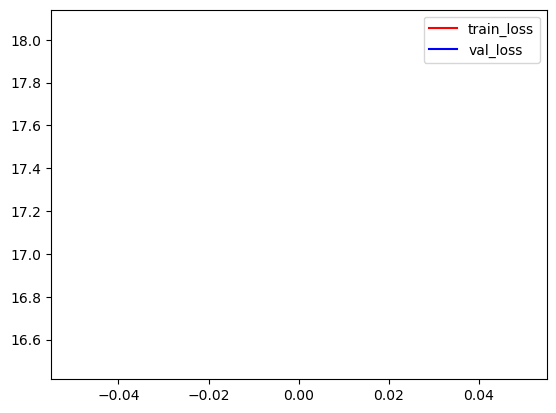

Finished Training Epoch: 0
Train: 2/50
Test: 2/50
Epoch: 1, Loss: 14.74, Accuracy: 0.73


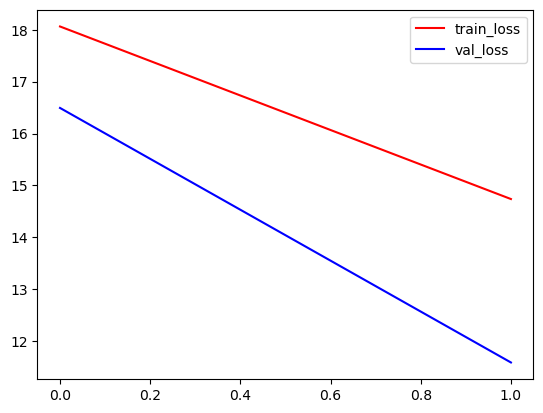

Finished Training Epoch: 1
Train: 3/50
Test: 3/50
Epoch: 2, Loss: 9.66, Accuracy: 0.86


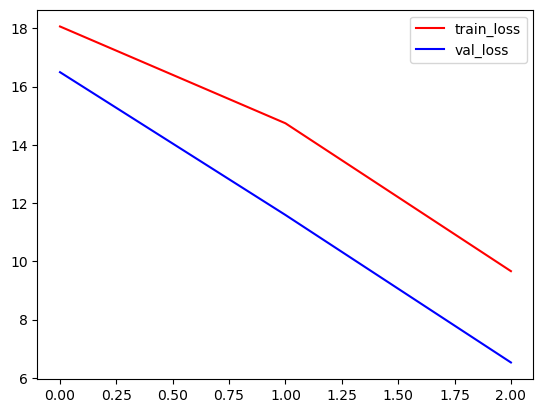

Finished Training Epoch: 2
Train: 4/50
Test: 4/50
Epoch: 3, Loss: 6.70, Accuracy: 0.87


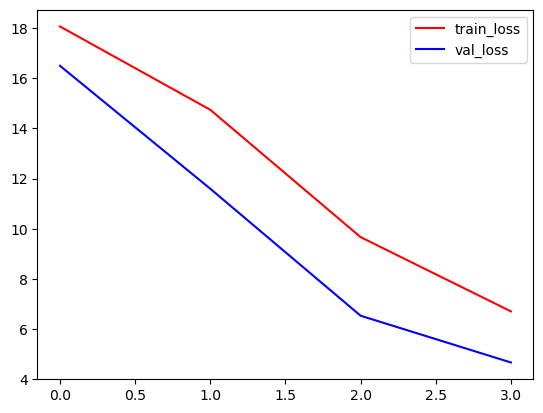

Finished Training Epoch: 3
Train: 5/50
Test: 5/50
Epoch: 4, Loss: 4.43, Accuracy: 0.90


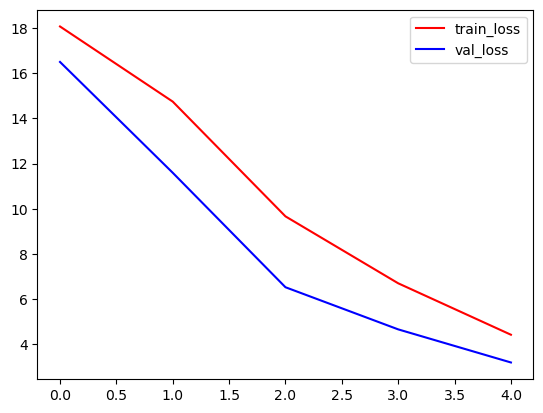

Finished Training Epoch: 4
Train: 6/50
Test: 6/50
Epoch: 5, Loss: 3.40, Accuracy: 0.90


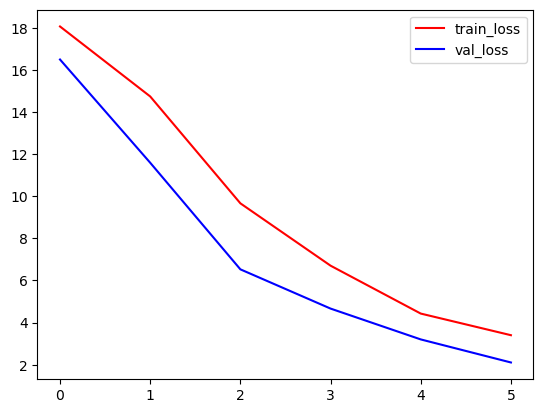

Finished Training Epoch: 5
Train: 7/50
Test: 7/50
Epoch: 6, Loss: 2.74, Accuracy: 0.91


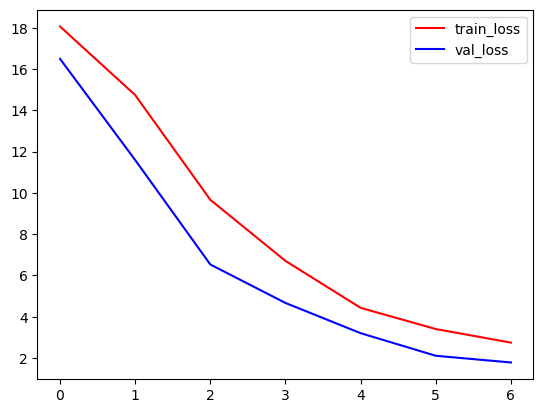

Finished Training Epoch: 6
Train: 8/50
Test: 8/50
Epoch: 7, Loss: 2.12, Accuracy: 0.92


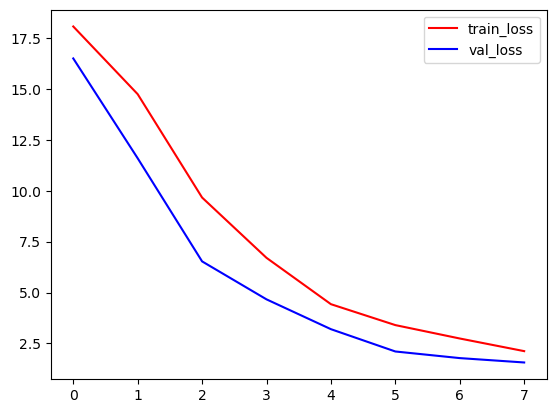

Finished Training Epoch: 7
Train: 9/50
Test: 9/50
Epoch: 8, Loss: 2.20, Accuracy: 0.91


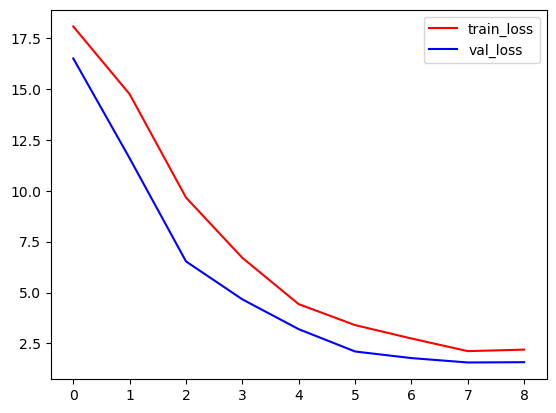

Finished Training Epoch: 8
Train: 10/50
Test: 10/50
Epoch: 9, Loss: 2.06, Accuracy: 0.92


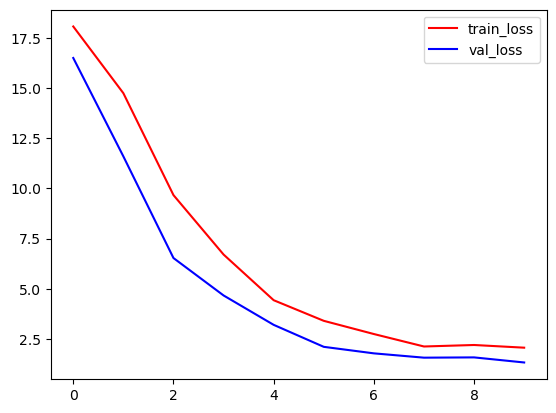

Finished Training Epoch: 9
Train: 11/50
Test: 11/50
Epoch: 10, Loss: 1.60, Accuracy: 0.93


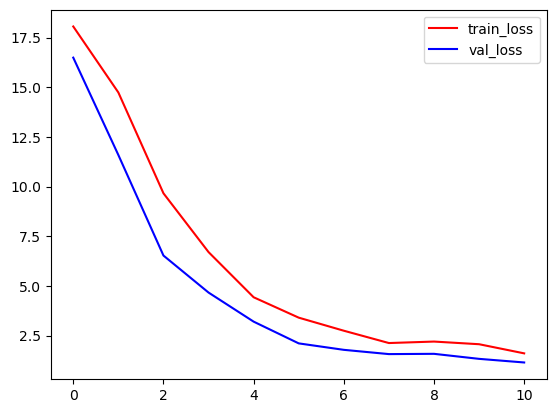

Finished Training Epoch: 10
Train: 12/50
Test: 12/50
Epoch: 11, Loss: 1.66, Accuracy: 0.92


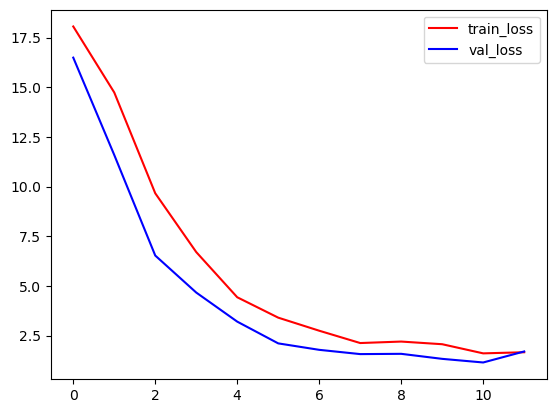

Finished Training Epoch: 11
Train: 13/50
Test: 13/50
Epoch: 12, Loss: 1.66, Accuracy: 0.93


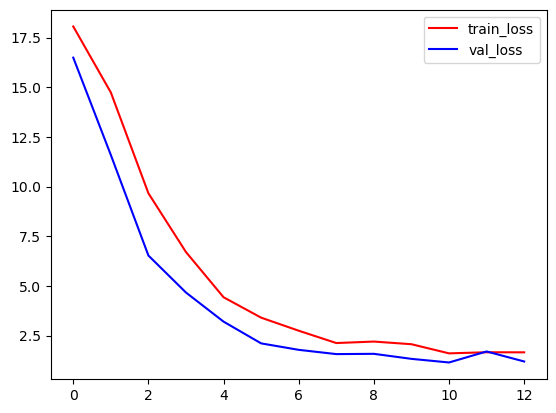

Finished Training Epoch: 12
Train: 14/50
Test: 14/50
Epoch: 13, Loss: 1.55, Accuracy: 0.93


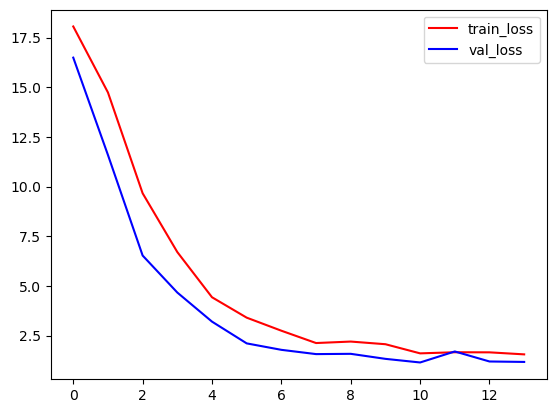

Finished Training Epoch: 13
Train: 15/50
Test: 15/50
Epoch: 14, Loss: 1.53, Accuracy: 0.93


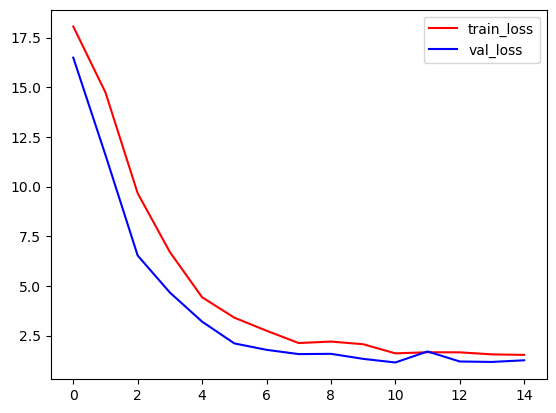

Finished Training Epoch: 14
Train: 16/50
Test: 16/50
Epoch: 15, Loss: 1.45, Accuracy: 0.92


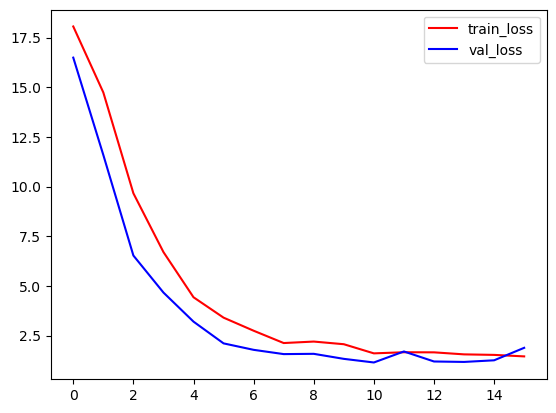

Finished Training Epoch: 15
Train: 17/50
Test: 17/50
Epoch: 16, Loss: 1.50, Accuracy: 0.93


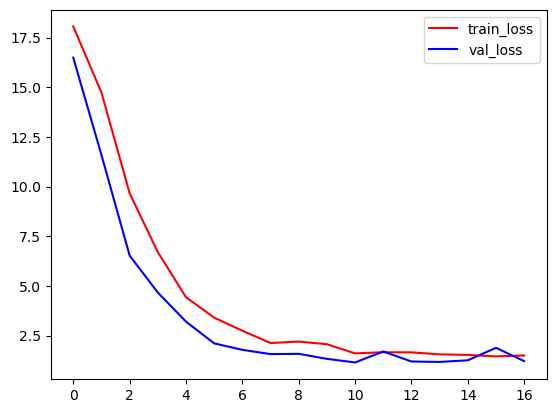

Finished Training Epoch: 16
Train: 18/50
Test: 18/50
Epoch: 17, Loss: 1.47, Accuracy: 0.94


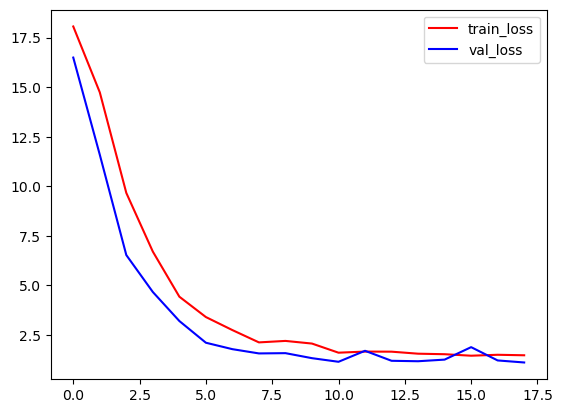

Finished Training Epoch: 17
Train: 19/50
Test: 19/50
Epoch: 18, Loss: 1.50, Accuracy: 0.93


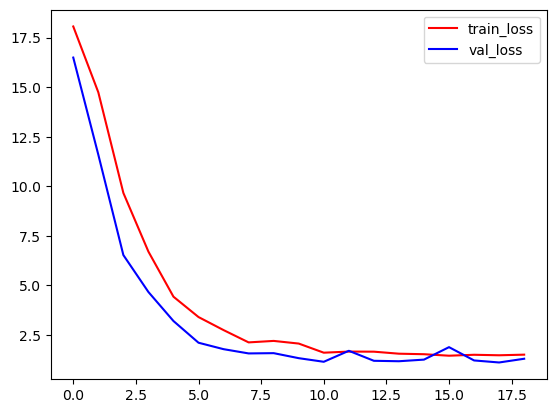

Finished Training Epoch: 18
Train: 20/50
Test: 20/50
Epoch: 19, Loss: 1.17, Accuracy: 0.94


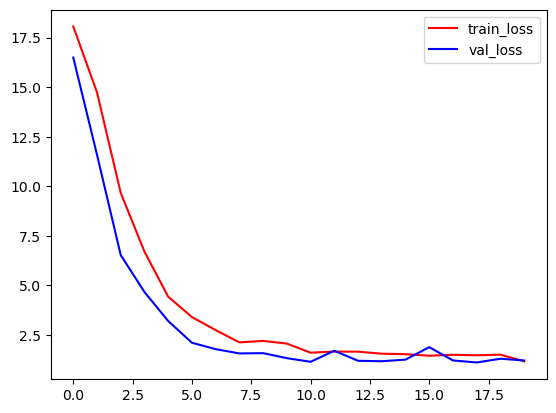

Finished Training Epoch: 19
Train: 21/50
Test: 21/50
Epoch: 20, Loss: 1.36, Accuracy: 0.94


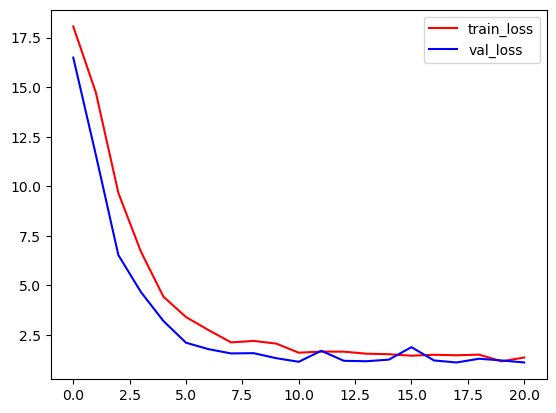

Finished Training Epoch: 20
Train: 22/50
Test: 22/50
Epoch: 21, Loss: 1.19, Accuracy: 0.94


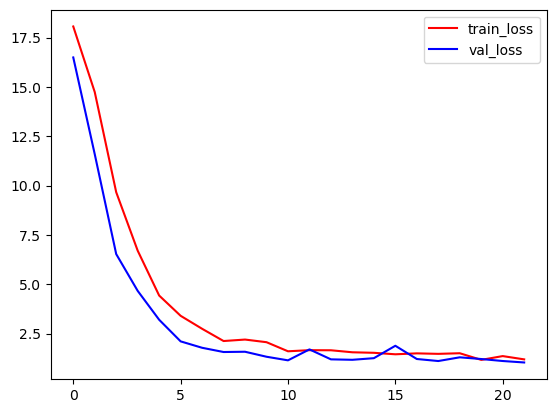

Finished Training Epoch: 21
Train: 23/50
Test: 23/50
Epoch: 22, Loss: 1.17, Accuracy: 0.94


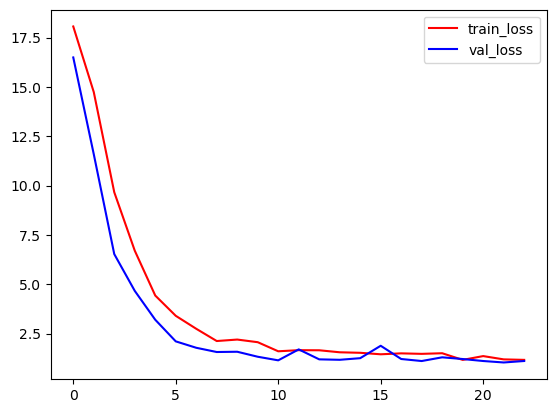

Finished Training Epoch: 22
Train: 24/50
Test: 24/50
Epoch: 23, Loss: 1.07, Accuracy: 0.95


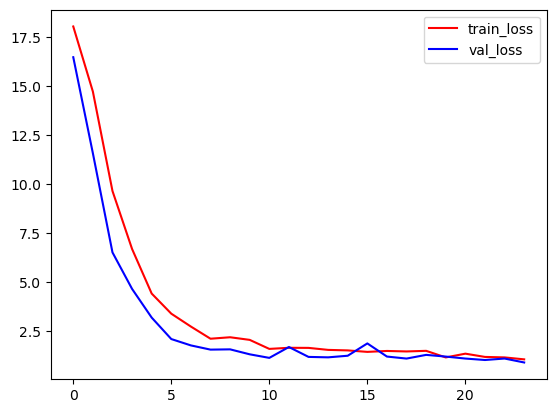

Finished Training Epoch: 23
Train: 25/50
Test: 25/50
Epoch: 24, Loss: 1.31, Accuracy: 0.94


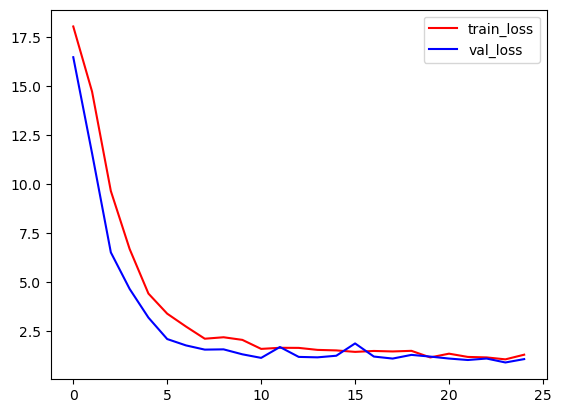

Finished Training Epoch: 24
Train: 26/50
Test: 26/50
Epoch: 25, Loss: 1.32, Accuracy: 0.93


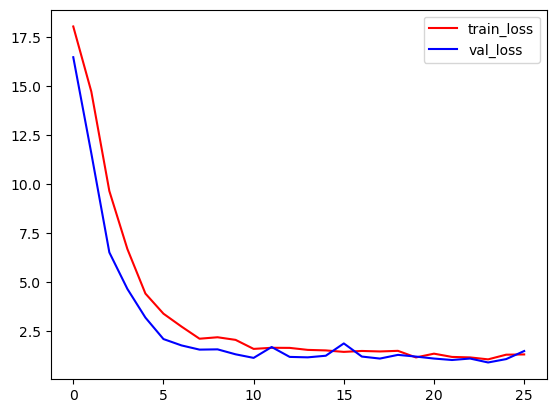

Finished Training Epoch: 25
Train: 27/50
Test: 27/50
Epoch: 26, Loss: 1.29, Accuracy: 0.95


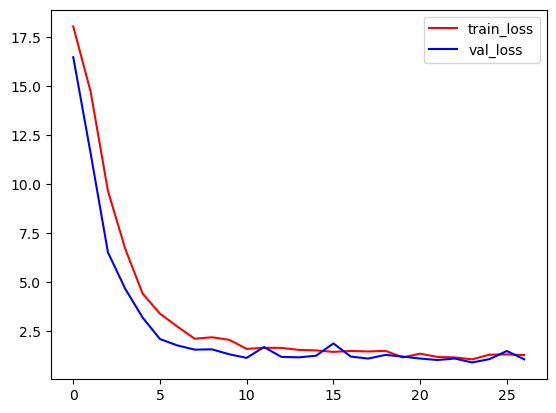

Finished Training Epoch: 26
Train: 28/50
Test: 28/50
Epoch: 27, Loss: 1.28, Accuracy: 0.94


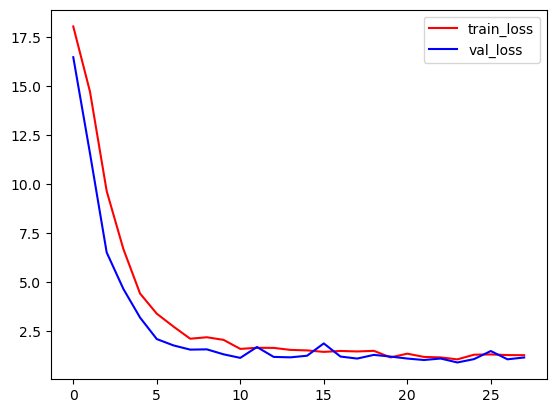

Finished Training Epoch: 27
Train: 29/50
Test: 29/50
Epoch: 28, Loss: 1.32, Accuracy: 0.94


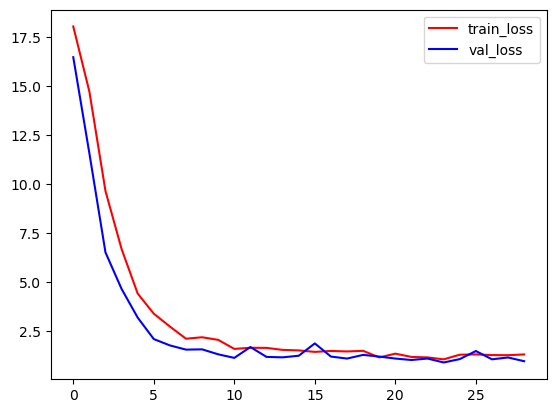

Finished Training Epoch: 28
Train: 30/50
Test: 30/50
Epoch: 29, Loss: 1.10, Accuracy: 0.95


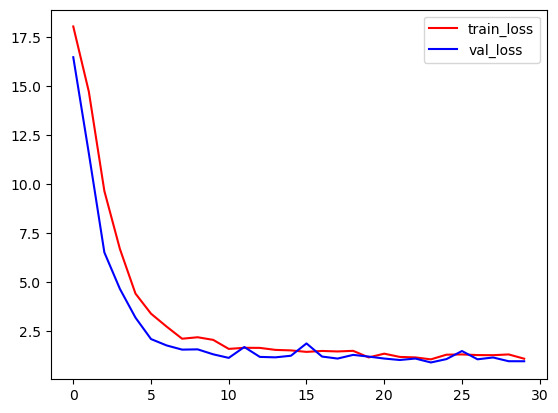

Finished Training Epoch: 29
Train: 31/50
Test: 31/50
Epoch: 30, Loss: 1.22, Accuracy: 0.95


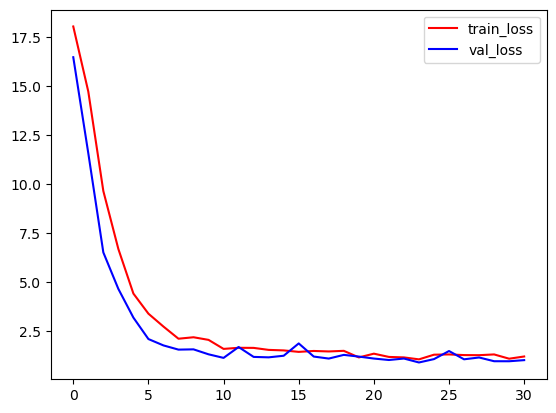

Finished Training Epoch: 30
Train: 32/50
Test: 32/50
Epoch: 31, Loss: 1.15, Accuracy: 0.94


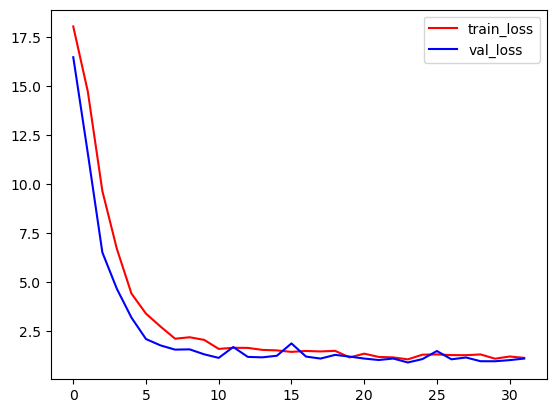

Finished Training Epoch: 31
Train: 33/50
Test: 33/50
Epoch: 32, Loss: 0.96, Accuracy: 0.95


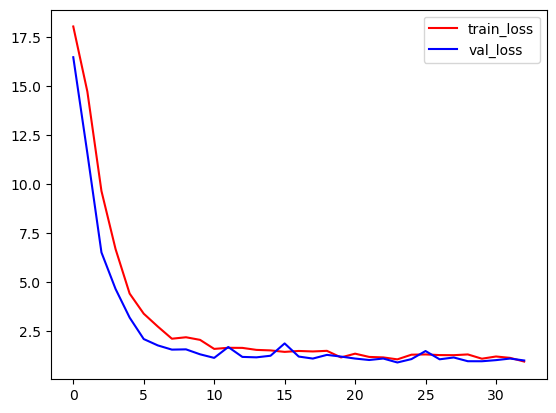

Finished Training Epoch: 32
Train: 34/50
Test: 34/50
Epoch: 33, Loss: 1.08, Accuracy: 0.94


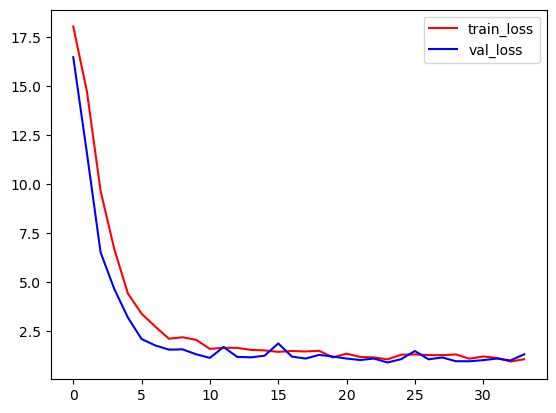

Finished Training Epoch: 33
Train: 35/50
Test: 35/50
Epoch: 34, Loss: 1.17, Accuracy: 0.95


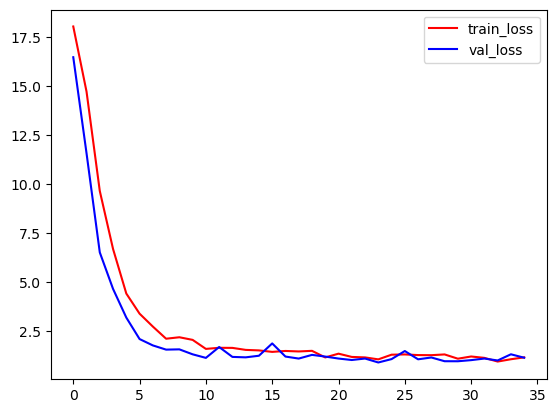

Finished Training Epoch: 34
Train: 36/50
Test: 36/50
Epoch: 35, Loss: 1.00, Accuracy: 0.96


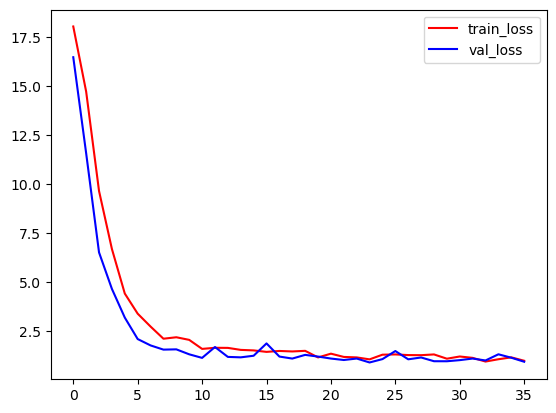

Finished Training Epoch: 35
Train: 37/50
Test: 37/50
Epoch: 36, Loss: 1.08, Accuracy: 0.95


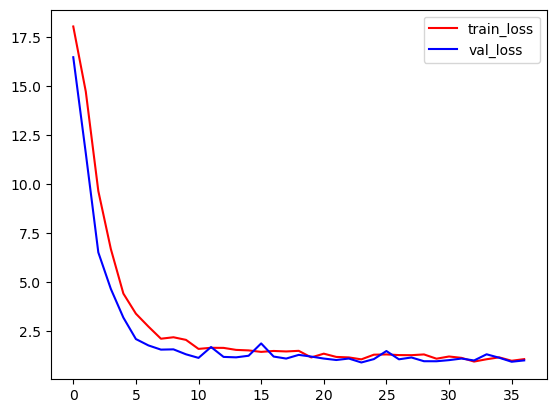

Finished Training Epoch: 36
Train: 38/50
Test: 38/50
Epoch: 37, Loss: 0.75, Accuracy: 0.97


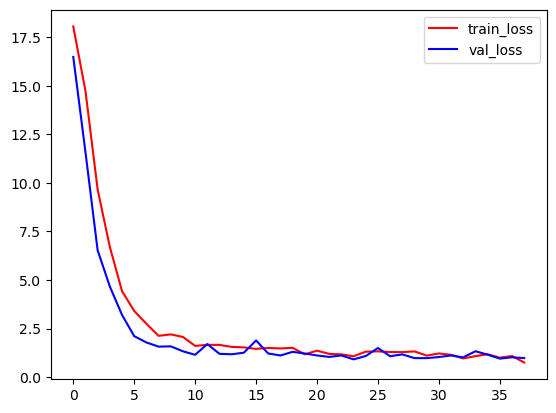

Finished Training Epoch: 37
Train: 39/50
Test: 39/50
Epoch: 38, Loss: 0.95, Accuracy: 0.96


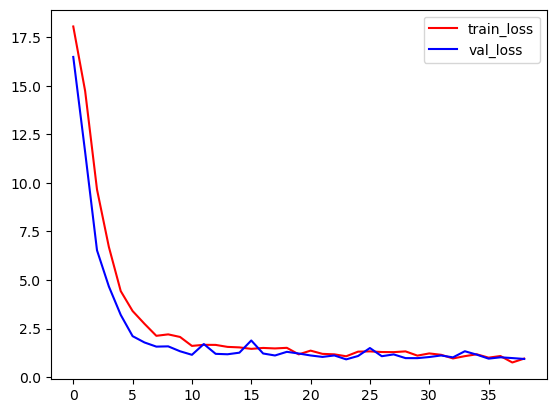

Finished Training Epoch: 38
Train: 40/50
Test: 40/50
Epoch: 39, Loss: 0.86, Accuracy: 0.96


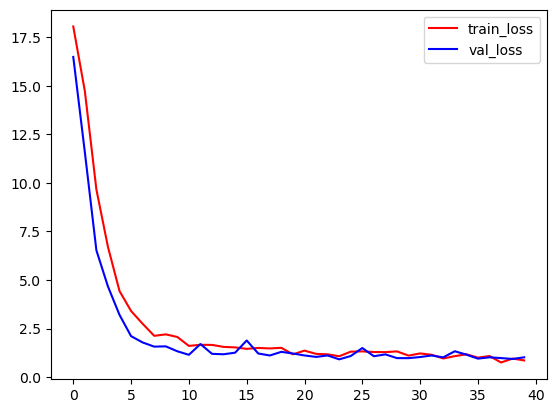

Finished Training Epoch: 39
Train: 41/50
Test: 41/50
Epoch: 40, Loss: 0.98, Accuracy: 0.96


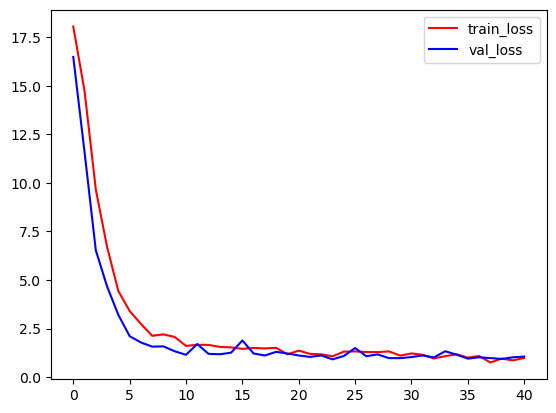

Finished Training Epoch: 40
Train: 42/50
Test: 42/50
Epoch: 41, Loss: 0.91, Accuracy: 0.96


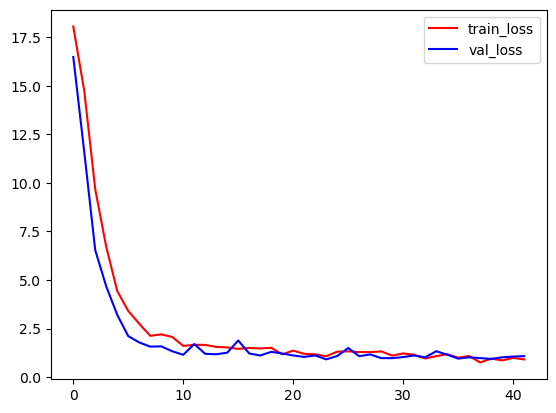

Finished Training Epoch: 41
Train: 43/50
Test: 43/50
Epoch: 42, Loss: 0.72, Accuracy: 0.96


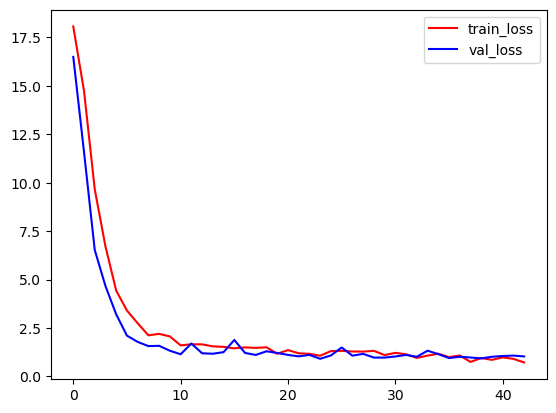

Finished Training Epoch: 42
Train: 44/50
Test: 44/50
Epoch: 43, Loss: 1.05, Accuracy: 0.95


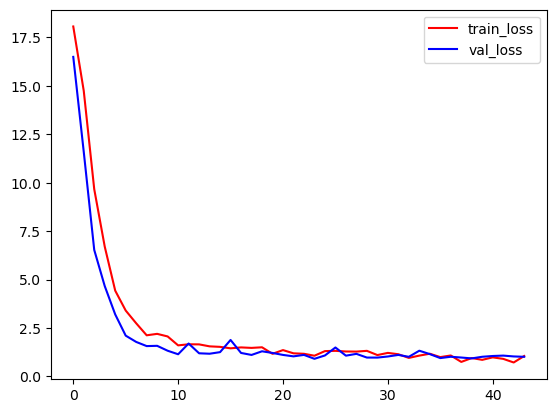

Finished Training Epoch: 43
Train: 45/50
Test: 45/50
Epoch: 44, Loss: 0.89, Accuracy: 0.96


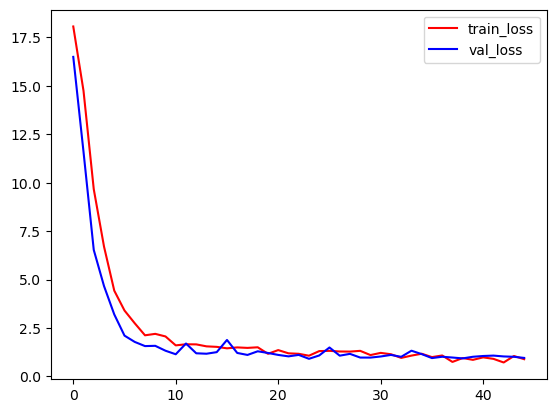

Finished Training Epoch: 44
Train: 46/50
Test: 46/50
Epoch: 45, Loss: 0.88, Accuracy: 0.96


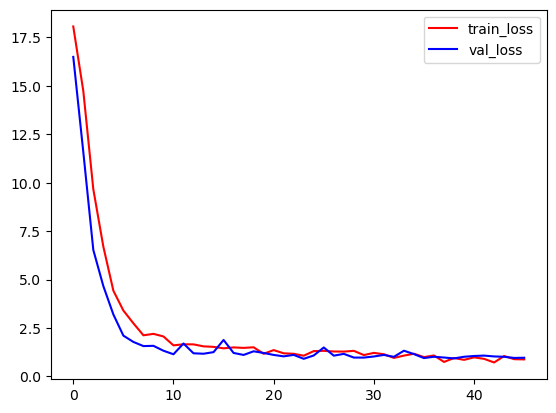

Finished Training Epoch: 45
Train: 47/50
Test: 47/50
Epoch: 46, Loss: 0.74, Accuracy: 0.96


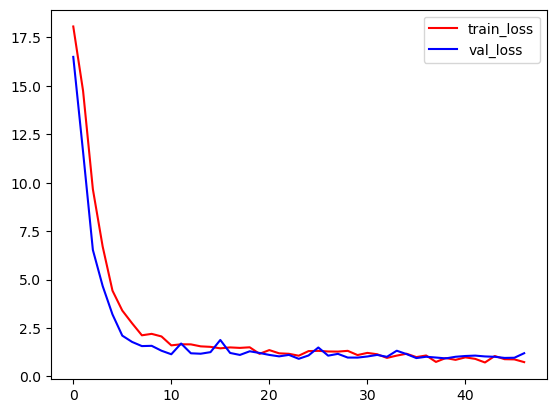

Finished Training Epoch: 46
Train: 48/50
Test: 48/50
Epoch: 47, Loss: 0.93, Accuracy: 0.96


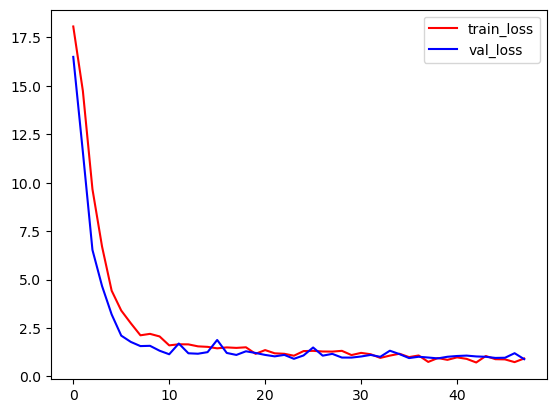

Finished Training Epoch: 47
Train: 49/50
Test: 49/50
Epoch: 48, Loss: 0.74, Accuracy: 0.96


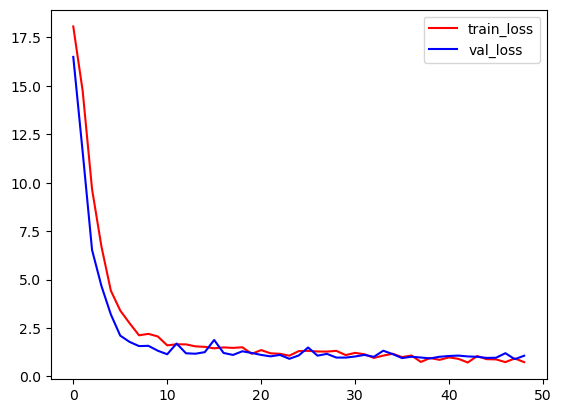

Finished Training Epoch: 48
Train: 50/50
Test: 50/50
Epoch: 49, Loss: 0.78, Accuracy: 0.96


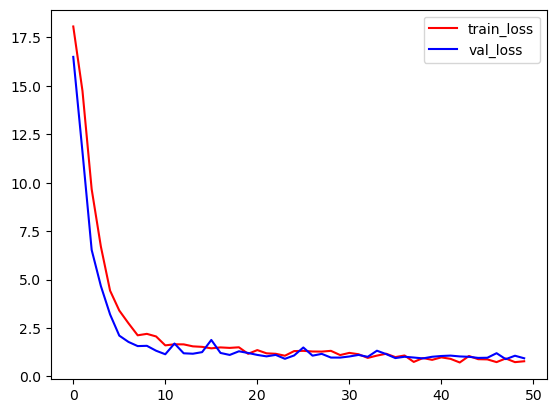

Finished Training Epoch: 49
--------------------- Training End ----------------------


In [11]:
# ----------------------------
# Training Loop
# ----------------------------

def draw_curve(current_epoch):
    x_epoch.append(current_epoch)
    ax0.plot(x_epoch, y_loss['train'], 'bo-', label='train')
    ax0.plot(x_epoch, y_loss['val'], 'ro-', label='val')
    ax1.plot(x_epoch, y_err['train'], 'bo-', label='train')
    ax1.plot(x_epoch, y_err['val'], 'ro-', label='val')
    if current_epoch == 0:
        ax0.legend()
        ax1.legend()
    fig.savefig(os.path.join('./lossGraphs', 'train.jpg'))

def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  train_loss = []
  val_loss = []
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')
    
  print("--------------------- Training Start ----------------------")
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    val_running = 0.0
    correct_prediction = 0
    total_prediction = 0
    #model.train()
    # Repeat for each batch in the training set
    model.train()
    print(f'Train: {epoch+1}/{num_epochs}')
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        model = model.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item() * inputs.size(0) 

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
            #print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    num_batches = len(train_dl)
    
    epoch_loss = running_loss / num_batches
    
    model.eval()
    print(f'Test: {epoch+1}/{num_epochs}')
    validationStep_loss = []
    for data_test in val_dl:
        
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data_test[0].to(device), data_test[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s
        # Get predictions
        #print(inputs.shape)
        outputs = model(inputs)
        validation_loss = criterion(outputs, labels)
        
        val_running += validation_loss.item() * inputs.size(0) 

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)

        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]
    
    # Print stats at the end of the epoch

    train_loss.append(epoch_loss)
    
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    
    val_loss.append(val_running / len(val_dl))
    
    print(f'Train Stats: [Epoch: {epoch+1}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}]')
    print(f'Train Stats: [Epoch: {epoch+1}, Loss: {val_loss:.2f}, Accuracy: {acc:.2f}]')
    
    plt.plot(np.array(train_loss), 'r', label='train_loss')
    plt.plot(np.array(val_loss),'b',label='val_loss')
    plt.legend()

    plt.show()

    print('Finished Training Epoch:', epoch)
  print("--------------------- Training End ----------------------")
  
num_epochs=30
training(model_2, train_dl, num_epochs)

In [12]:
# Save the Model
#torch.save(model_2.state_dict(), 'siren_detection_model_4.pth')

In [10]:
trained_model = AudioClassifier()
trained_model.load_state_dict(torch.load('siren_detection_model_4.pth'))
trained_model = trained_model.to(device)
trained_model.eval()

AudioClassifier(
  (conv1): Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (relu1): ReLU()
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu2): ReLU()
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu3): ReLU()
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu4): ReLU()
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (ap): AdaptiveAvgPool2d(output_size=1)
  (lin): Linear(in_features=64, out_features=10, bias=True)
  (conv): Sequential(
    (0): Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, mome

# Inference

Accuracy: 0.95, Total items: 367
[0.0007618205804053856]


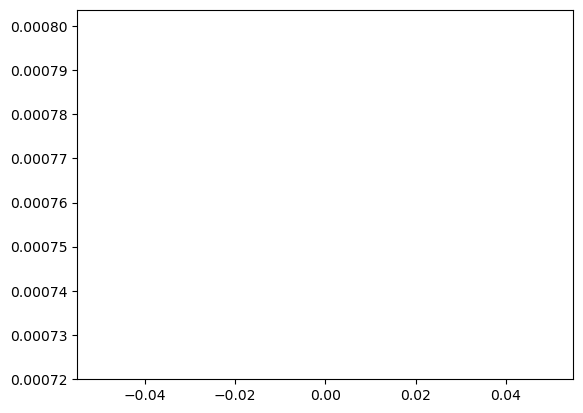

In [14]:
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    
    loss_values = []
    criterion = nn.CrossEntropyLoss()
    
    for data in val_dl:
      running_loss = 0.0
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s
      # Get predictions
      #print(inputs.shape)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
    
      running_loss += loss.item() * inputs.size(0) 

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
    
      '''for i in prediction:
            if i == 1:
                print('Ambulance Detected')
            else:
                print('No Ambulance')'''
      #print('Predicted:', prediction)
      #print('Actual:', labels)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]
    
  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

  val_loss = running_loss / len(train_dl)
  loss_values.append(val_loss)
  print(loss_values)

  plt.plot(np.array(loss_values), 'r')
  plt.show()

# Run inference on trained model with the validation set
inference(trained_model, val_dl)

# Soundcard for input

In [2]:
import soundcard as sc
import time

mics = sc.all_microphones()
speaker = sc.get_speaker('Realtek')
usb_microphone = sc.get_microphone('USB')
print(usb_microphone)

IndexError: no device with id USB

In [5]:
mic = sc.all_microphones()
print(mic)

[<Microphone NDI Webcam 2 (NewTek NDI Audio) (2 channels)>, <Microphone NDI Webcam 1 (NewTek NDI Audio) (2 channels)>, <Microphone Microphone (Realtek(R) Audio) (2 channels)>, <Microphone CABLE Output (VB-Audio Virtual Cable) (2 channels)>, <Microphone NDI Webcam 4 (NewTek NDI Audio) (2 channels)>, <Microphone NDI Webcam 3 (NewTek NDI Audio) (2 channels)>]


## Record From Microphone

In [6]:
import numpy
auds = []
win = 3
count = 0

duration = 3000
new_sr = 44100
shift_pct = 0.4
n_mels=64
n_fft=1024
hop_len=None
top_db = 80
channel = 2
sr = 44100

def open_file(audio_file, sr):
    return (audio_file, sr)

with usb_microphone.recorder(samplerate=44100) as mic, \
            speaker.player(samplerate=44100) as sp:
    print("Recording...")
    data = mic.record(numframes=529200)
    print("Done...Stop your sound so you can hear playback")
    
    time.sleep(1)
    #sp.play(data)
    #sig_mic = torch.tensor(data)
    waves = []
    #print(len(sig_mic[1]))
    for i in range(0, len(data),win * sr):
        y = data[count:win * sr + count]
        count += 1
        
        tensor_mic = torch.tensor(y).reshape((2, -1))

        sig_mic = tensor_mic.float()
        aud = open_file(sig_mic, sr)
            #sig_mic = sig_mic.cat(sr)
            #print(aud)

        reaud = AudioUtil.resample(aud, new_sr)
        rechan = AudioUtil.rechannel(reaud, channel)
        dur_aud = AudioUtil.pad_trunc(rechan, duration)
        shift_aud = AudioUtil.time_shift(dur_aud, shift_pct)
        sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
        aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
        
        waves.append(aug_sgram.numpy())
    
    #sig_mic = torch.tensor(numpy.array(auds))
    
    stacked = numpy.stack(waves)
    batch = torch.tensor(stacked)
        
    #print(batch[0][0])
    for i in range(4):
        plot_spectrogram(aug_sgram[0], sr)


NameError: name 'usb_microphone' is not defined

# Real-Time Siren Recognition

In [ ]:
from queue import Queue
from threading import Thread
from paho.mqtt import client as mqtt_client

def connect_mqtt():
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code %d\n", rc)
    # Set Connecting Client ID
    client = mqtt_client.Client(client_id)
    # client.username_pw_set(username, password)
    client.on_connect = on_connect
    client.connect(broker, port)
    return client


def publish(client, text, tp):
    msg = f"{text}"
    result = client.publish(tp, msg)
    # result: [0, 1]
    status = result[0]


def cons_inference(model, client):
    detect = 0
    not_detect = 0
    batch = 0
    sleep(11)
    while not batch_q.empty():
        print('Fetching')
        data = batch_q.get()
        is_ambulance = False
        for i in range(2):
            plot_spectrogram(data[i][0], 44100)

          # Disable gradient updates
        with torch.no_grad():
              # Get the input features and target labels, and put them on the GPU
            inputs = data.to(device)

              # Normalize the inputs
            inputs_m, inputs_s = inputs.float().mean(), inputs.std()
            input = (inputs - inputs_m) / inputs_s

            outputs = model(input)

              # Get the predicted class with the highest score
            probs = torch.nn.functional.softmax(outputs, dim=1)
            conf, prediction = torch.max(probs,1)
            
            common_conf = (conf[0] + conf[1])/2
            
            print(prediction[0])
            print(prediction[1])
            print(common_conf)
            
            if prediction[0] == 1 and prediction[1] == 1 and common_conf > 0.48:
                is_ambulance = True
            elif prediction[0] == 1 or prediction[1] == 1:
                print(conf)
                if common_conf > 0.60:
                    is_ambulance = True
            
            if is_ambulance:
                print('Ambulance Siren Detected', common_conf)
                publish(client,1,topic)
                batch+=1
                detect+=1
            else:
                print('No Ambulance Siren')
                publish(client,0,topic)
                not_detect+=1
                batch+=1
            
            sleep(11)
            
    f = open("sound_recognition_results.txt", "a")
            
    f.write(f'Detected: {detect}\n')
    f.write(f'Not Detected: {not_detect}\n')
    f.write(f'Total Batches: {batch}\n\n')
    f.close()

In [ ]:
import numpy
auds = []
win = 3
count = 0
from time import sleep

broker = 'localhost'
port = 1883
topic = "em/sound"
client_id = f'python-mqtt-{random.randint(0, 1000)}'

client = connect_mqtt()

def open_file(audio_file, sr):
    return (audio_file, sr)

def detect_ambulance():

    duration = 3000
    new_sr = 44100
    shift_pct = 0.4
    n_mels=64
    n_fft=1024
    hop_len=None
    top_db = 80
    channel = 2
    sr = 44100
    init = False


    with usb_microphone.recorder(samplerate=44100) as mic, \
                speaker.player(samplerate=44100) as sp:
        batch = 0
        frames = []
        waves = []
        print("Recording...")
        while not record_state.empty():
            data = mic.record(numframes=2000)
            #print(data.shape)
            frames.append(data)
            #print(len(frames))

            if batch >= 2:
                print(batch)
                stacked = numpy.stack(waves)
                final_audio = torch.tensor(stacked)

                print('-----DETECTING FROM BATCH-----')
                
                #batch_q.put(final_audio)   
                direct_inference(trained_model, client, final_audio)

                batch = 0
                waves = []
                
                
            if len(frames) > (new_sr * 3) / 1024 and not init:
                print('Initial')
                aud = numpy.stack(frames)
                # merge to 2D 3sec windows
                aud = aud.transpose(2,0,1).reshape(2,-1)
                
                # convert to tensor
                tensor_mic = torch.tensor(aud)
                tensor_mic = tensor_mic.float()

                aud = open_file(tensor_mic, sr)

                reaud = AudioUtil.resample(aud, new_sr)
                rechan = AudioUtil.rechannel(reaud, channel)

                dur_aud = AudioUtil.pad_trunc(rechan, duration)
                shift_aud = AudioUtil.time_shift(dur_aud, shift_pct)
                sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
                #aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

                waves.append(sgram.numpy())
                batch += 1
                init = True

                
            if init and len(frames) > 160:
                #print('frames: ', len(frames))
                frames = frames[30:]
                aud = numpy.stack(frames)
                # merge to 2D 3sec windows
                aud = aud.transpose(2,0,1).reshape(2,-1)
                
                # convert to tensor
                tensor_mic = torch.tensor(aud)
                tensor_mic = tensor_mic.float()

                aud = open_file(tensor_mic, sr)

                reaud = AudioUtil.resample(aud, new_sr)
                rechan = AudioUtil.rechannel(reaud, channel)

                dur_aud = AudioUtil.pad_trunc(rechan, duration)
                shift_aud = AudioUtil.time_shift(dur_aud, shift_pct)
                sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
                #aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

                #plot_spectrogram(sgram[0], new_sr)
                waves.append(sgram.numpy())

                batch += 1
        print('Record Stopped')
    
#detection = detect_ambulance()

In [ ]:
from IPython.display import clear_output

def direct_inference(model, client, audio):
    detect = 0
    not_detect = 0
    batch = 0

    print('Fetching')
    data = audio
    is_ambulance = False
    for i in range(2):
        plot_spectrogram(data[i][0], 44100)

      # Disable gradient updates
    with torch.no_grad():
          # Get the input features and target labels, and put them on the GPU
        inputs = data.to(device)

          # Normalize the inputs
        inputs_m, inputs_s = inputs.float().mean(), inputs.std()
        input = (inputs - inputs_m) / inputs_s

        outputs = model(input)

          # Get the predicted class with the highest score
        probs = torch.nn.functional.softmax(outputs, dim=1)
        conf, prediction = torch.max(probs,1)

        common_conf = (conf[0] + conf[1])/2

        print(prediction[0], conf[0])
        print(prediction[1], conf[1])
        print(common_conf)

        if prediction[0] == 1 and prediction[1] == 1 and common_conf > 0.80:
            is_ambulance = True
        elif prediction[0] == 1 or prediction[1] == 1:
            #print(conf)
            if common_conf > 0.60:
                is_ambulance = True

        #clear_output()
        if is_ambulance:
            print('SIREN PRESENT', common_conf)
            publish(client,1,topic)

        else:
            print('NO SIREN PRESENT')
            publish(client,0,topic)

## Stream Microphone

In [ ]:
if not record_state.empty():
    record_state.get()
if not batch_q.empty():
    batch_q.get()

Record Stopped


Recording...
Initial
2
-----DETECTING FROM BATCH-----
Fetching


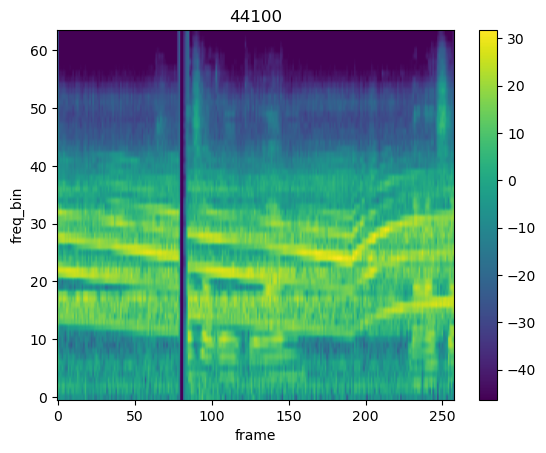

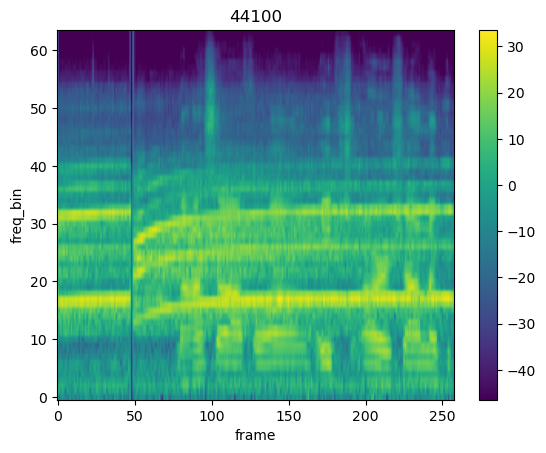

tensor(1, device='cuda:0') tensor(0.9006, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9655, device='cuda:0')
tensor(0.9331, device='cuda:0')
SIREN PRESENT tensor(0.9331, device='cuda:0')
2
-----DETECTING FROM BATCH-----
Fetching


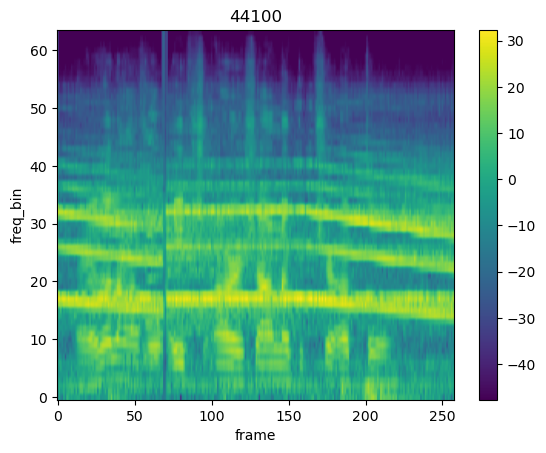

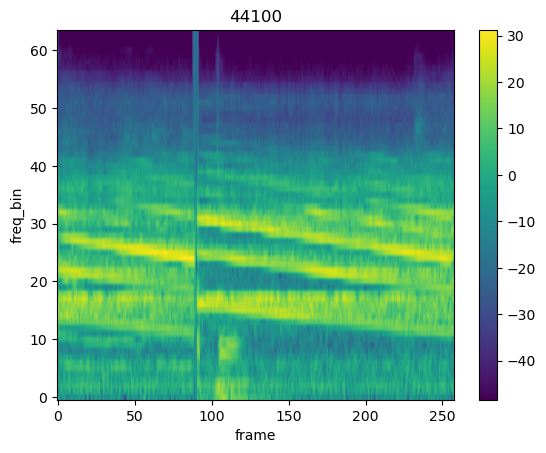

tensor(1, device='cuda:0') tensor(0.9904, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9660, device='cuda:0')
tensor(0.9782, device='cuda:0')
SIREN PRESENT tensor(0.9782, device='cuda:0')
2
-----DETECTING FROM BATCH-----
Fetching


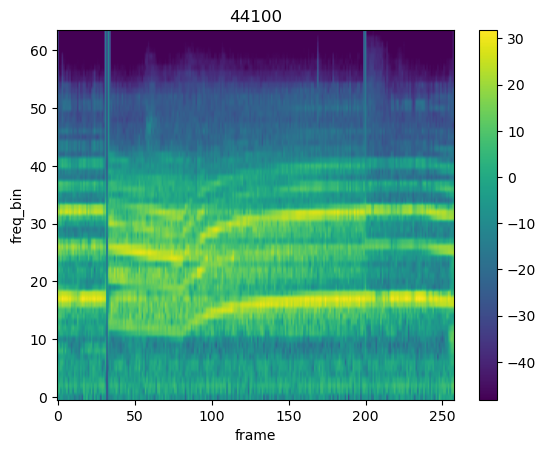

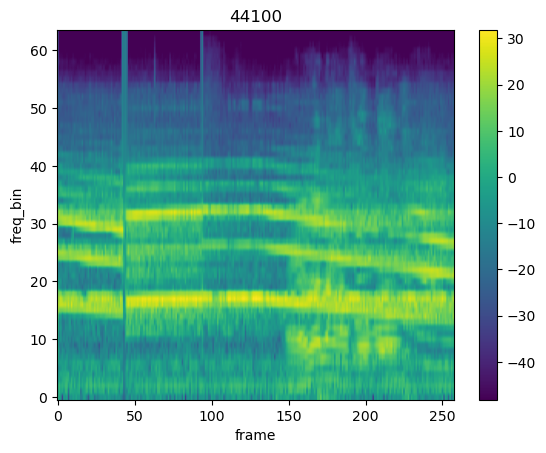

tensor(1, device='cuda:0') tensor(0.9934, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9910, device='cuda:0')
tensor(0.9922, device='cuda:0')
SIREN PRESENT tensor(0.9922, device='cuda:0')
2
-----DETECTING FROM BATCH-----
Fetching


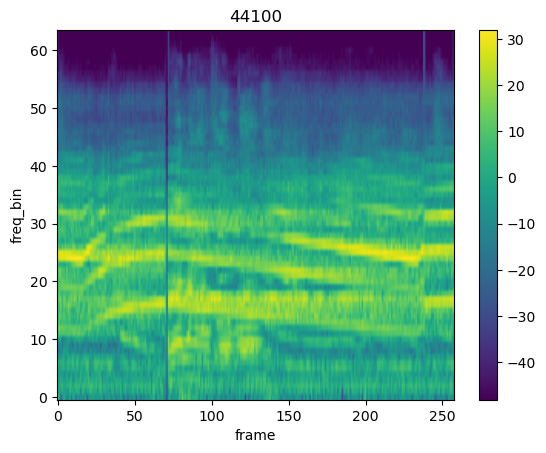

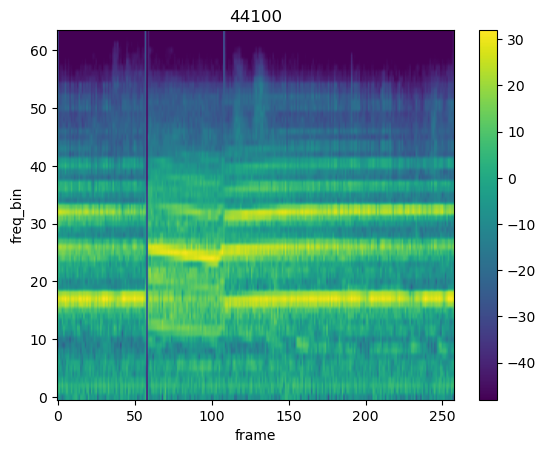

tensor(1, device='cuda:0') tensor(0.9654, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9984, device='cuda:0')
tensor(0.9819, device='cuda:0')
SIREN PRESENT tensor(0.9819, device='cuda:0')
2
-----DETECTING FROM BATCH-----
Fetching


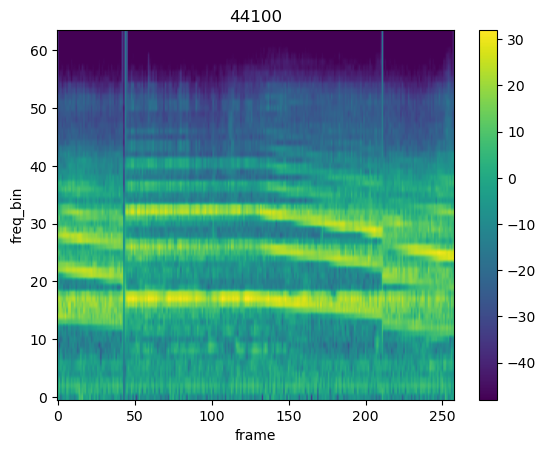

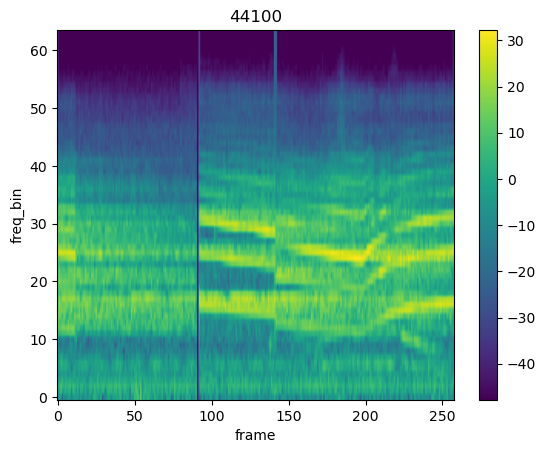

tensor(1, device='cuda:0') tensor(0.9982, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9750, device='cuda:0')
tensor(0.9866, device='cuda:0')
SIREN PRESENT tensor(0.9866, device='cuda:0')
2
-----DETECTING FROM BATCH-----
Fetching


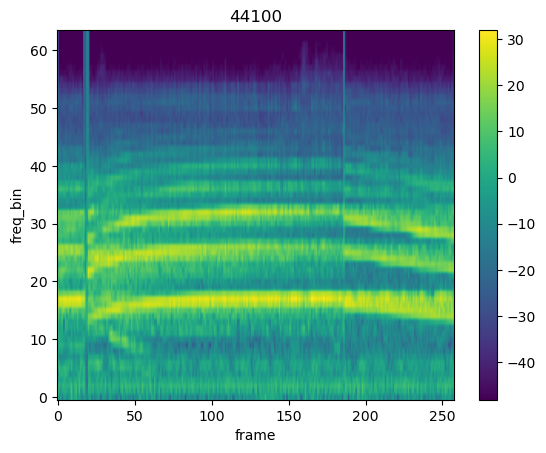

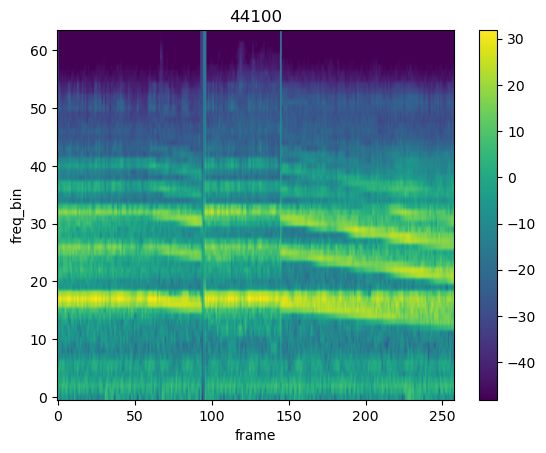

tensor(1, device='cuda:0') tensor(0.9957, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9938, device='cuda:0')
tensor(0.9947, device='cuda:0')
SIREN PRESENT tensor(0.9947, device='cuda:0')


In [ ]:
broker = '192.168.1.10'
port = 1883
topic = "em/sound"
client_id = f'python-mqtt-{random.randint(0, 1000)}'

#client = connect_mqtt()

record_state = Queue()
batch_q = Queue()

record_state.put(True)

record = Thread(target=detect_ambulance)
record.start()
#sound_classification = Thread(target=cons_inference, args=(trained_model,client,))
#sound_classification.start()